# Traitement des données G353 feathered isolated contsub crop

In [1]:
%pylab inline
from astropy.io import fits
import aplpy
from pywavan import fbm2d, powspec, fan_trans, subfits
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


***
# Verification des données enregistré

In [2]:
im_g = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/coh.npy")

Text(0.5, 1.0, 'Coherent')

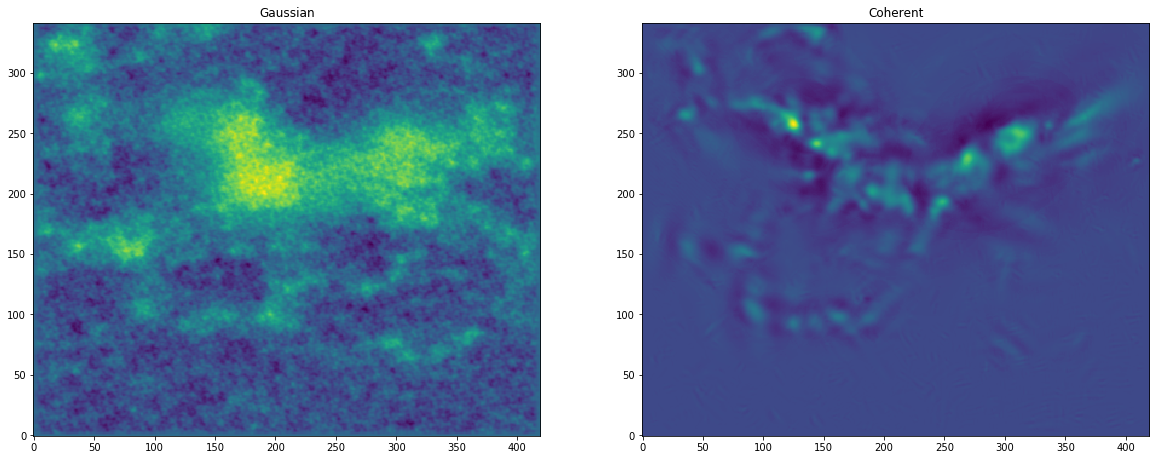

In [3]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_g[23].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[23].real,origin="lower")
title('Coherent')

***
4 image de la partie cohérente à différente partie du cube de donnée

In [4]:
im_ng.shape

(34, 342, 420)

Text(0.5, 1.0, 'canal 30')

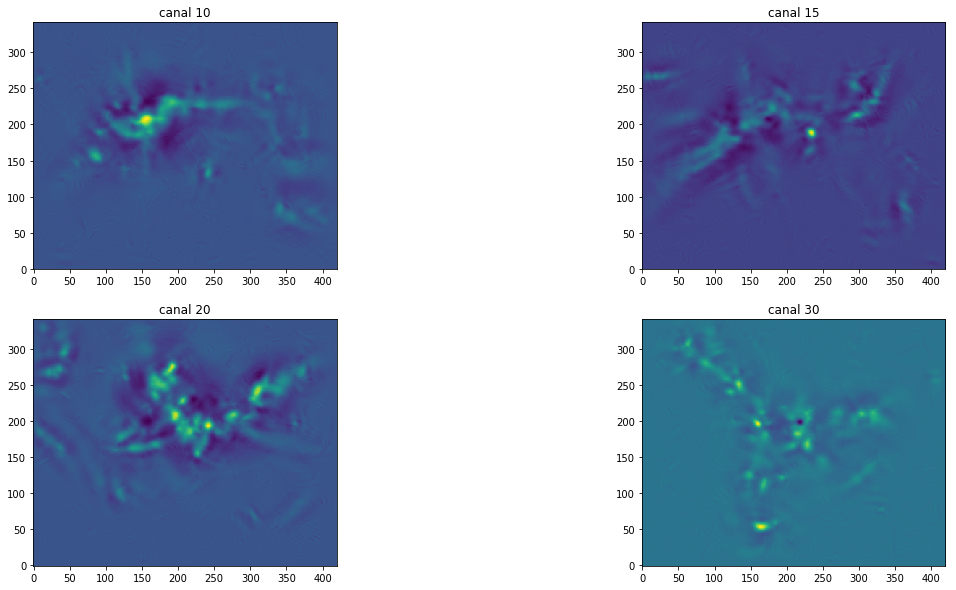

In [5]:
figure(figsize=(20,10))

subplot(2,2,1)
imshow(im_ng[10].real,origin="lower")
title('canal 10')

subplot(2,2,2)
imshow(im_ng[15].real,origin="lower")
title('canal 15')

subplot(2,2,3)
imshow(im_ng[20].real,origin="lower")
title('canal 20')

subplot(2,2,4)
imshow(im_ng[30].real,origin="lower")
title('canal 30')

***
# Transformation des données en fichier fits

In [6]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [7]:
fits.writeto("/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits",im_ng.real, header) 

In [8]:
fits.writeto("/user/workdir/soldanof/data/G353f_iso_cnts/gau.fits",im_g.real, header) 

***
# Traitement des fichier créé

Trace d'une image

INFO: Auto-setting vmin to -9.399e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.923e-01 [aplpy.core]


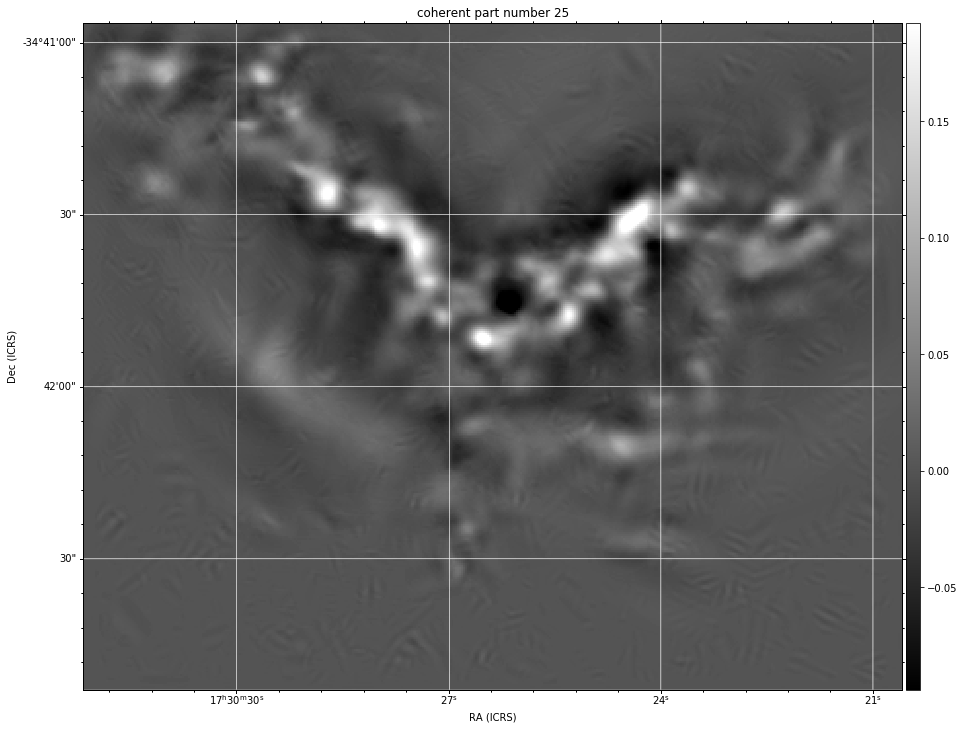

In [9]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 25
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part number {}".format(nbr))

INFO: Auto-setting vmin to -5.972e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.440e-02 [aplpy.core]


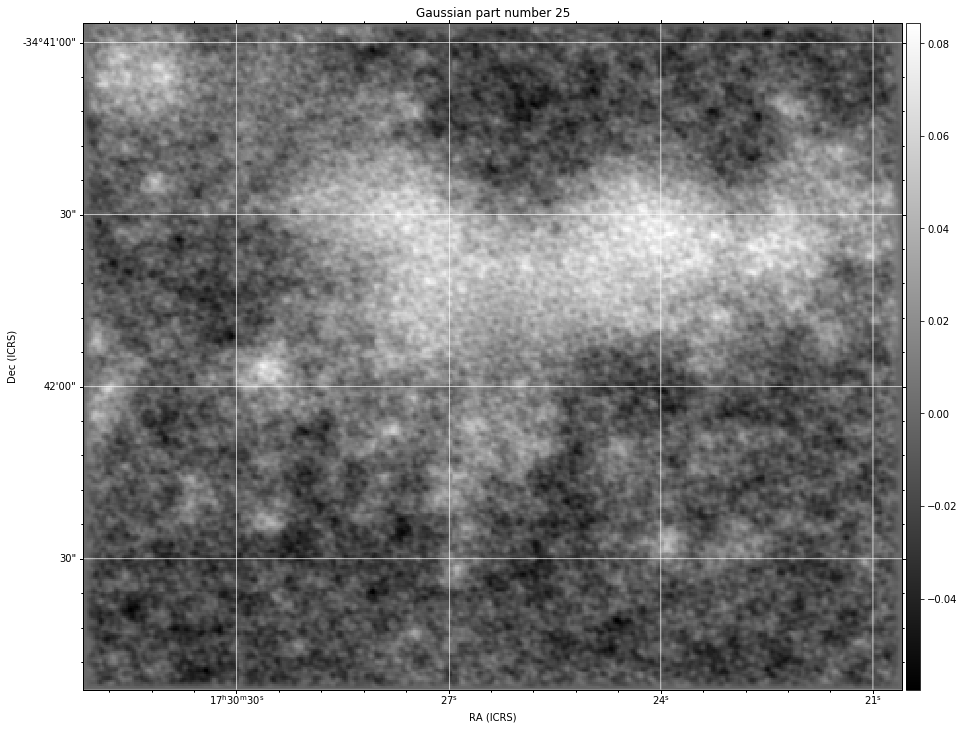

In [10]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/gau.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("Gaussian part number {}".format(nbr))

***
Trace Freq en fonction de Ra pour la partie gaussienne et la partie cohérente

In [ ]:
fig_all = plt.figure(1, figsize=(20,20))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/gau.fits",figure=fig_all,dimensions=[0,2],slices=[100])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("gaussian part")

INFO: Auto-setting vmin to -8.870e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.265e-01 [aplpy.core]


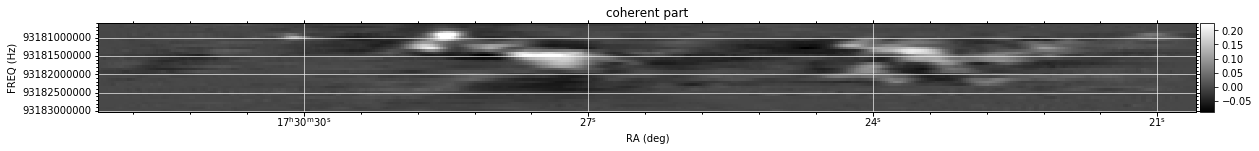

In [11]:
fig_all = plt.figure(1, figsize=(20,20))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits",figure=fig_all,dimensions=[0,2],slices=[250])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part")

***
# creation carte intégré (moment 0)

In [12]:
im_ng.shape

(34, 342, 420)

In [64]:
im_ng = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/coh.npy")
im_ng_int = np.sum(im_ng,axis=0)

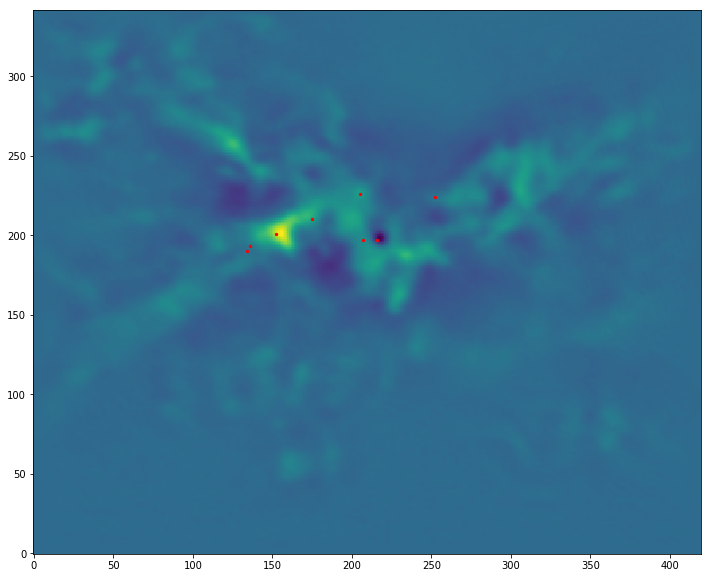

In [72]:
filname = "/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)

freq = w.pixel_to_world(0,0,0)[1]

acoord =[ 262.6090726, 262.6164935, 262.6103159, 262.6184752, 262.6049155, 262.6182964, 262.6137893, 262.6101217]

dcoord = [-34.6959940, -34.6956105, -34.6932468, -34.6966326, -34.6934384, -34.6963706, -34.6947225, -34.6959940]

figure(figsize=(20,10))
imshow(im_ng_int.real,origin="lower")
for i in range(len(acoord)) :
    p1 = SkyCoord(acoord[i],dcoord[i], frame='icrs', unit='deg')
    skyp1 = w.world_to_pixel(p1,freq)[0:2]
    x1= int(skyp1[0])
    y1= int(skyp1[1])
    plt.scatter(x1, y1, s=5, c='r', marker='o')



In [15]:
im_tot_int = np.sum(cube,axis=0)

Text(0.5, 1.0, 'moment 0 original cube')

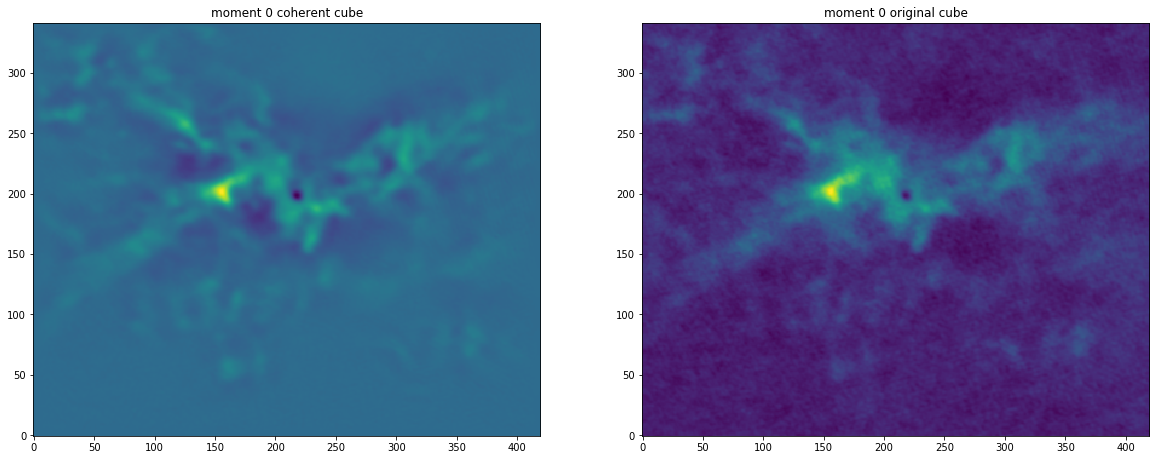

In [16]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent cube')

subplot(1,2,2)
imshow(im_tot_int.real,origin="lower")
title('moment 0 original cube') 

In [17]:
del header['NAXIS3']
del header['PC3_1']
del header['PC3_2']
del header['PC1_3']
del header['PC2_3']
del header['PC3_3']
del header['CTYPE3']
del header['CRVAL3']
del header['CDELT3']
del header['CRPIX3']
del header['CUNIT3']

In [18]:
header['NAXIS']=2
fits.writeto("/user/workdir/soldanof/data/G353f_iso_cnts/ng_t.fits",im_ng_int.real, header,overwrite= True) 

INFO: Auto-setting vmin to -5.565e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.920e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.041e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.846e+00 [aplpy.core]


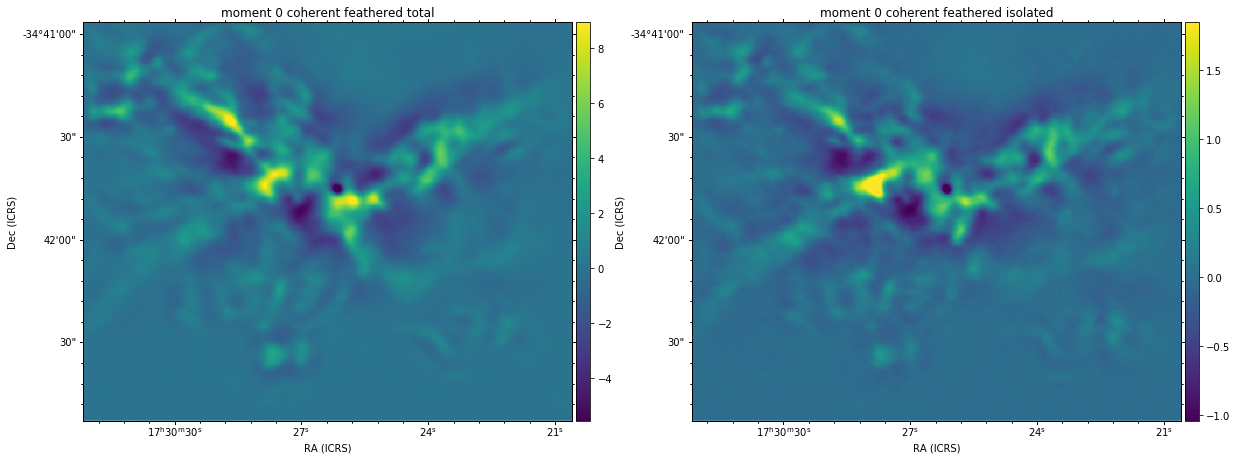

In [20]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_contsub/ng_t.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent feathered total")


f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent feathered isolated")

In [30]:
input1 = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop-mom0.fits'
output = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop-mom0_cut.fits'
coord = np.array([267,299,686,640])
subfits(input1,output,coord)

Dimensions 420 342


In [120]:
input1 = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop-0.07pix-mom1.fits'
output = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop-0.07pix-mom1_cut.fits'
coord = np.array([267,299,686,640])
subfits(input1,output,coord)

Dimensions 420 342


INFO: Auto-setting vmin to -1.398e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.753e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.017e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.666e+00 [aplpy.core]


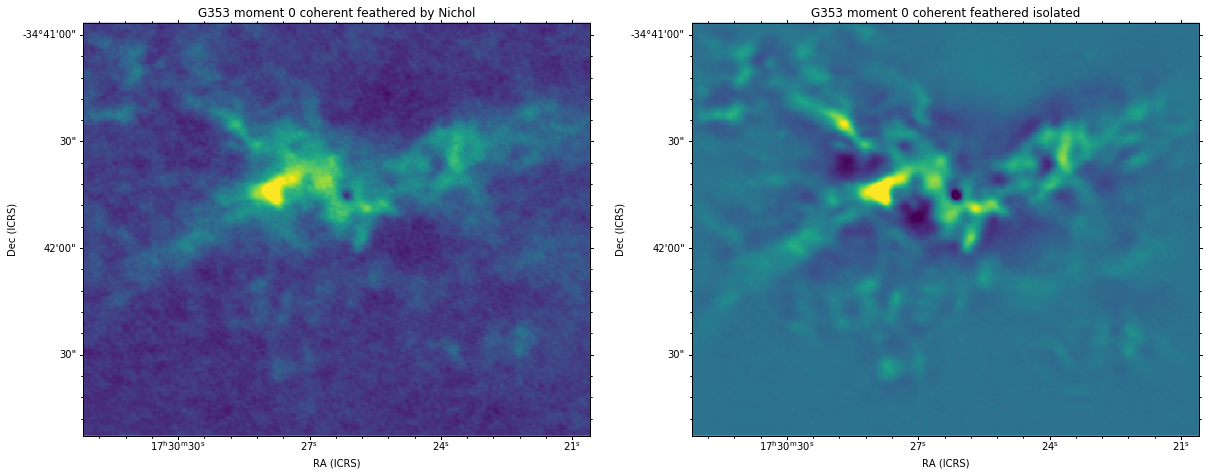

In [96]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop-mom0_cut.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
#f.add_colorbar()
f.set_title("G353 moment 0 coherent feathered by Nichol")


f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale()
#f.add_colorbar()
f.set_title("G353 moment 0 coherent feathered isolated")

***
# Moment 1

In [107]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits")
#HDU = fits.open("/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits")
cube = HDU[0].data
header = HDU[0].header

In [110]:
im_g = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/coh.npy")

In [83]:
im_ng.shape

(34, 342, 420)

In [88]:

im_ng = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/gau.npy")
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
N = header['NAXIS3']

for i in range(N):
    cube[i,:,:] -= np.mean(cube[i,:,:])
    moy = (cube[i,:,:]).mean()
    im_ad = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_ad[np.abs(im_ng_2d)>=np.abs(cube[i,5:70,5:100]).mean()] = moy
    im_ng[i,:,:] = im_ng[i,:,:] + im_ad
    
    im_rmv = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_rmv[(im_ng_2d)<=0] = np.nan
    im_ng[i,:,:] = im_ng[i,:,:] + im_rmv
    #im_g[i,:,:] = im_g[i,:,:]+moy

In [ ]:
figure(figsize=(20,20))
subplot(131)
imshow(im_ad.real,origin="lower")

subplot(132)
imshow(im_ng[15].real,origin="lower")

subplot(133)
imshow(im_ng_o[15].real,origin="lower")

In [89]:
fits.writeto("/user/homedir/soldanof/g_g353_f_iso_mean.fits",im_ng.real, header, overwrite = True) 

In [15]:
cohS=np.load("/user/workdir/soldanof/data/G353f_iso_cnts/cohScale.npy")
scale = cohS[1].shape[0]
iscale=int(scale/2)

HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
N = header['NAXIS3']

for j in range(10,14):
    im_ng=[]
    print("create cube",j)
    for i in range(N):
        
        im = cohS[i]
        imNG = np.sum(im[j:(scale-2),:,:], axis=0)
        im_ng.append(imNG)
    im_ng = np.array(im_ng)    
    print("clean cube")
    for i in range(N):
        
        cube[i,:,:] -= np.mean(cube[i,:,:])
        #im_ng[i,:,:] += np.mean(cube[i,:,:])
        
        moy = (cube[i,:,:]).mean()
        im_ad = np.zeros((im_ng.shape[1],im_ng.shape[2]))
        im_ng_2d = im_ng[i,:,:]
        im_ad[np.abs(im_ng_2d)>=np.abs(cube[i,5:70,5:100]).mean()] = moy
        im_ng[i,:,:] = im_ng[i,:,:] + im_ad
        
        
        im_rmv = np.zeros((im_ng.shape[1],im_ng.shape[2]))
        im_ng_2d = im_ng[i,:,:]
        im_rmv[(im_ng_2d)<=np.abs(cube[i,:,:]).mean()] = np.nan
        im_ng[i,:,:] = im_ng[i,:,:] + im_rmv
    fits.writeto("/user/homedir/soldanof/ng_g353f{}.fits".format(j),im_ng.real, header, overwrite = True) 

create cube 10
clean cube
create cube 11
clean cube
create cube 12
clean cube
create cube 13
clean cube
create cube 14
clean cube


In [23]:
input1 = '/user/homedir/soldanof/ng_g353f13.fits'
output = '/user/homedir/soldanof/ng_g353f13_cut.fits'
coord = np.array([113,149,0,277,238,33])
subfits(input1,output,coord)

Dimensions 165 90 34


INFO: Auto-setting vmin to -2.051e+01 [aplpy.core]
INFO: Auto-setting vmax to -1.355e+01 [aplpy.core]
INFO: Auto-setting vmin to -2.067e+01 [aplpy.core]
INFO: Auto-setting vmax to -1.343e+01 [aplpy.core]


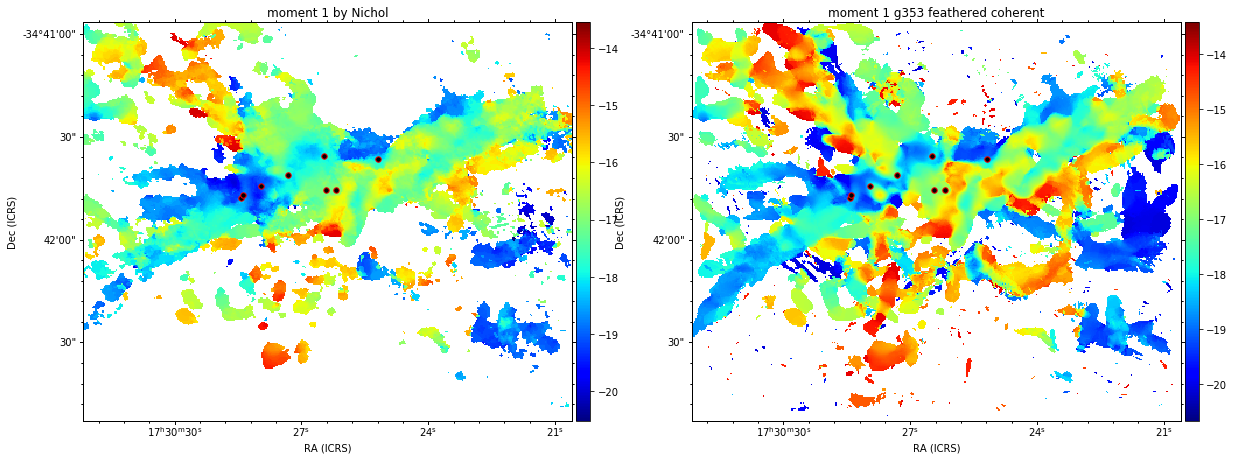

In [93]:
filname = "/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)
freq = w.pixel_to_world(0,0,0)[1]
acoord =[ 262.6090726, 262.6164935, 262.6103159, 262.6184752, 262.6049155, 262.6182964, 262.6137893, 262.6101217]

dcoord = [-34.6959940, -34.6956105, -34.6932468, -34.6966326, -34.6934384, -34.6963706, -34.6947225, -34.6959940]


fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop-0.07pix-mom1_cut.fits",figure=fig_vel, subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
for i in range(len(acoord)) :
    p1 = SkyCoord(acoord[i],dcoord[i], frame='icrs', unit='deg')
    skyp1 = w.world_to_pixel(p1,freq)[0:2]
    f.show_markers(skyp1[0],skyp1[1],coords_frame='pixel',facecolor='k')
f.set_title("moment 1 by Nichol")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
for i in range(len(acoord)) :
    p1 = SkyCoord(acoord[i],dcoord[i], frame='icrs', unit='deg')
    skyp1 = w.world_to_pixel(p1,freq)[0:2]
    f.show_markers(skyp1[0],skyp1[1],coords_frame='pixel',facecolor='k')
f.set_title("moment 1 g353 feathered coherent")

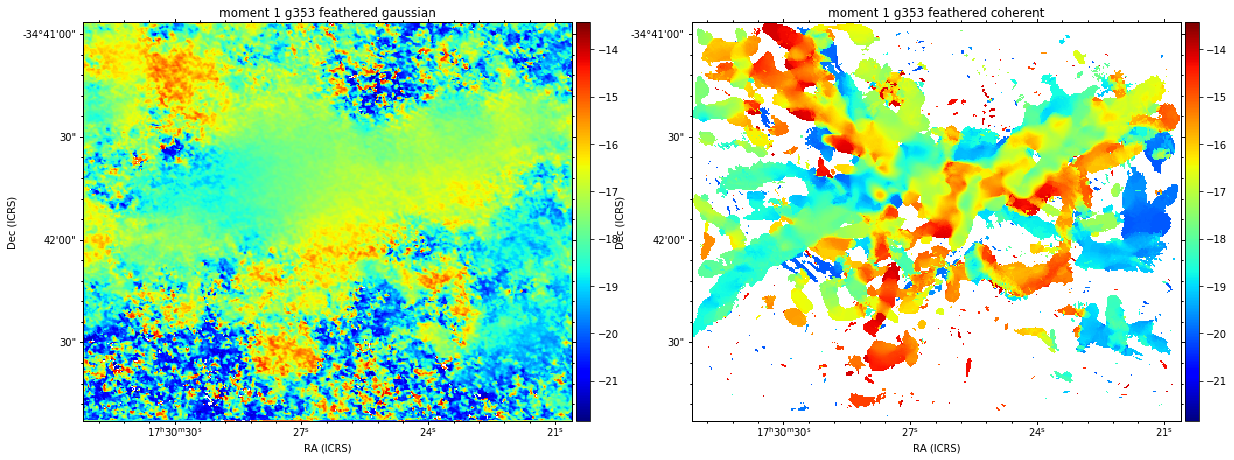

In [92]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1G353f_gauss.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet', vmin = -2.185e+01, vmax = -1.343e+01)
f.add_colorbar()
f.set_title("moment 1 g353 feathered gaussian")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'jet', vmin = -2.185e+01, vmax = -1.343e+01)
f.add_colorbar()
f.set_title("moment 1 g353 feathered coherent")

INFO: Auto-setting vmin to -2.064e+01 [aplpy.core]
INFO: Auto-setting vmax to -1.340e+01 [aplpy.core]
INFO: Auto-setting vmin to -2.067e+01 [aplpy.core]
INFO: Auto-setting vmax to -1.343e+01 [aplpy.core]


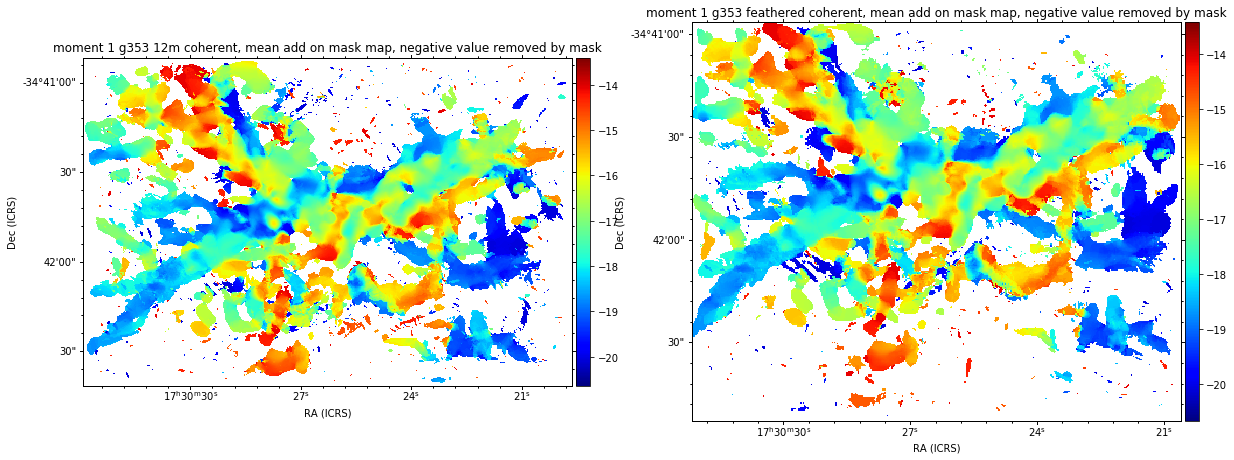

In [158]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_12_iso_cnts/moment1_g353_12_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
f.set_title("moment 1 g353 12m coherent, mean add on mask map, negative value removed by mask")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
f.set_title("moment 1 g353 feathered coherent, mean add on mask map, negative value removed by mask")

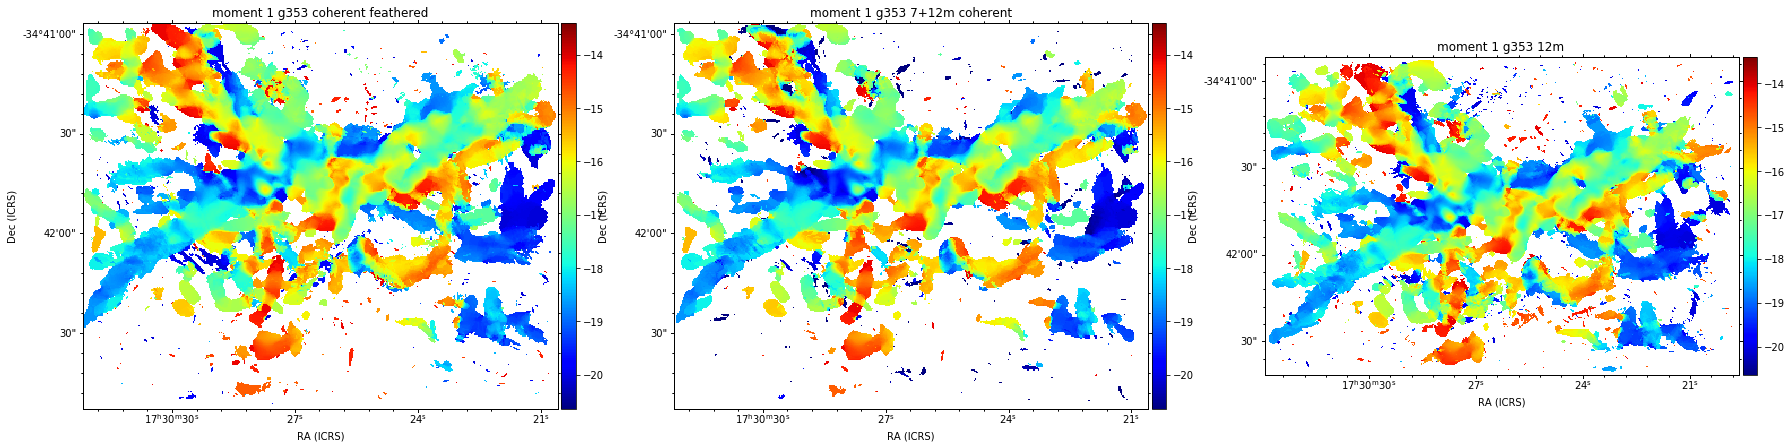

In [73]:
fig_vel = plt.figure(6,figsize=(30,30))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,3,1))  
f.show_colorscale(cmap = 'jet', vmin = -2.064e+01, vmax = -1.340e+01)
f.add_colorbar()
f.set_title("moment 1 g353 coherent feathered")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/moment1_g353_7_12_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,3,2))  
f.show_colorscale(cmap = 'jet', vmin = -2.064e+01, vmax = -1.340e+01)
f.add_colorbar()
f.set_title("moment 1 g353 7+12m coherent")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_12_iso_cnts/moment1_g353_12_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,3,3))  
f.show_colorscale(cmap = 'jet', vmin = -2.064e+01, vmax = -1.340e+01)
f.add_colorbar()
f.set_title("moment 1 g353 12m ")

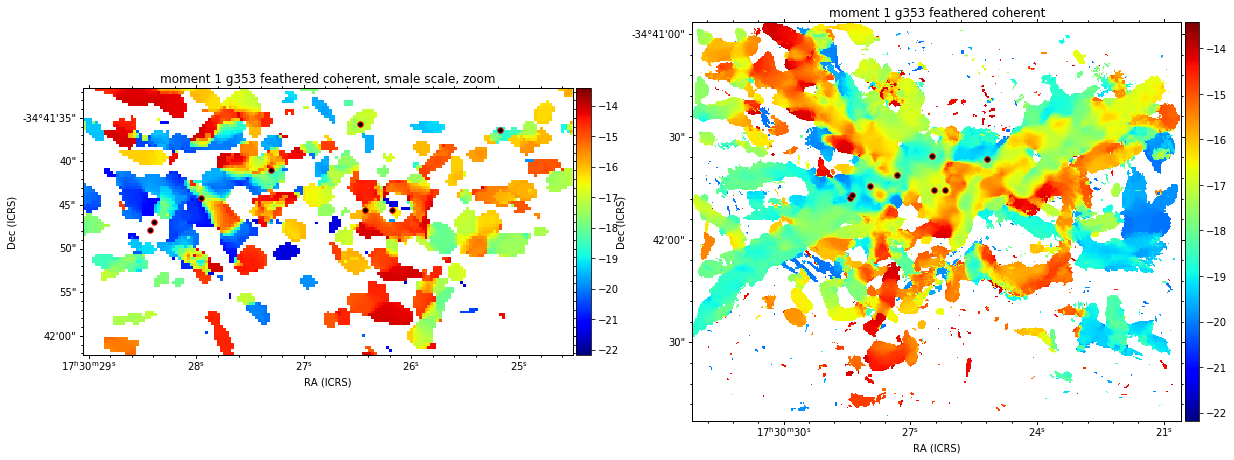

In [98]:

acoord =[ 262.6090726, 262.6164935, 262.6103159, 262.6184752, 262.6049155, 262.6182964, 262.6137893, 262.6101217]

dcoord = [-34.6959940, -34.6956105, -34.6932468, -34.6966326, -34.6934384, -34.6963706, -34.6947225, -34.6959940]

filname = "/user/workdir/soldanof/data/G353f_iso_cnts/moment1G353f_SC_cut.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1G353f_SC_cut.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet', vmin = -2.218e+01, vmax = -1.343e+01)
f.add_colorbar()
for i in range(len(acoord)) :
    p1 = SkyCoord(acoord[i],dcoord[i], frame='icrs', unit='deg')
    skyp1 = w.world_to_pixel(p1)[0:2]
    f.show_markers(skyp1[0],skyp1[1],coords_frame='pixel',facecolor='k')
f.set_title("moment 1 g353 feathered coherent, smale scale, zoom")

filname = "/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)
freq = w.pixel_to_world(0,0,0)[1]
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'jet', vmin = -2.218e+01, vmax = -1.343e+01)
f.add_colorbar()
for i in range(len(acoord)) :
    p1 = SkyCoord(acoord[i],dcoord[i], frame='icrs', unit='deg')
    skyp1 = w.world_to_pixel(p1,freq)[0:2]
    f.show_markers(skyp1[0],skyp1[1],coords_frame='pixel',facecolor='k')
f.set_title("moment 1 g353 feathered coherent")

INFO: Auto-setting vmin to -2.218e+01 [aplpy.core]
INFO: Auto-setting vmax to -1.328e+01 [aplpy.core]


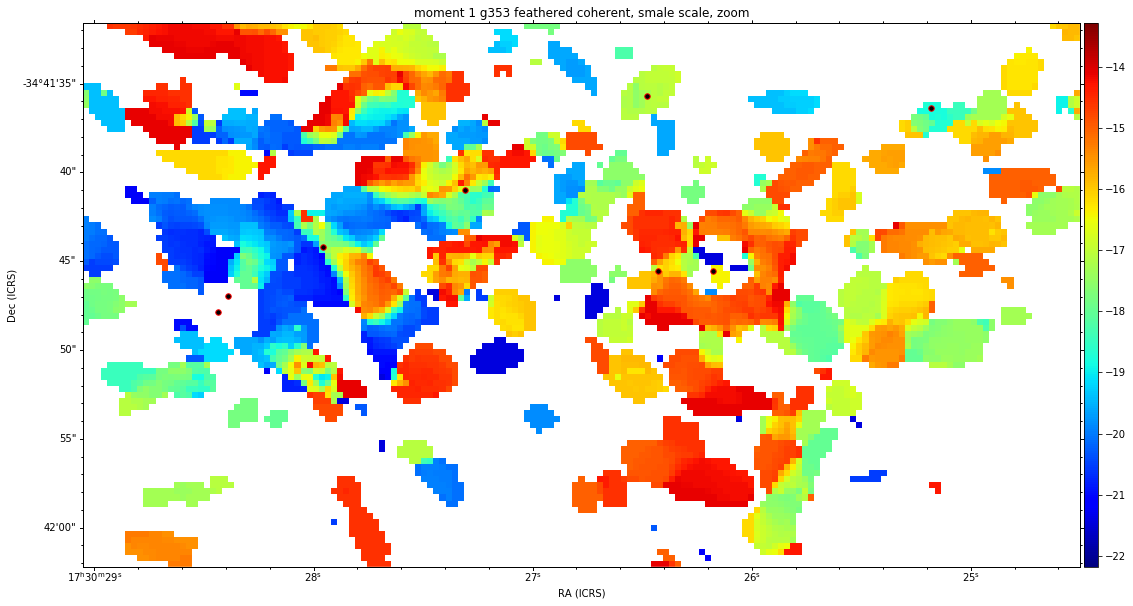

In [97]:

acoord =[ 262.6090726, 262.6164935, 262.6103159, 262.6184752, 262.6049155, 262.6182964, 262.6137893, 262.6101217]

dcoord = [-34.6959940, -34.6956105, -34.6932468, -34.6966326, -34.6934384, -34.6963706, -34.6947225, -34.6959940]

filname = "/user/workdir/soldanof/data/G353f_iso_cnts/moment1G353f_SC_cut.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1G353f_SC_cut.fits",figure=fig_vel)  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
for i in range(len(acoord)) :
    p1 = SkyCoord(acoord[i],dcoord[i], frame='icrs', unit='deg')
    skyp1 = w.world_to_pixel(p1)[0:2]
    f.show_markers(skyp1[0],skyp1[1],coords_frame='pixel',facecolor='k')
f.set_title("moment 1 g353 feathered coherent, smale scale, zoom")

In [18]:
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

In [156]:
HDU = fits.open("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits")
cube = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
	del header['CROTA1']
	del header['CROTA2']
	del header['CROTA3']

w = wcs.WCS(header)

p1 = SkyCoord('17:30:31.218 -34:42:41.102', unit=(u.hourangle, u.deg))
skyp1 = w.world_to_pixel(p1)[0:2]
x1= int(skyp1[0])
y1= int(skyp1[1])

p2 = SkyCoord('17:30:20.935 -34:40:58.761', unit=(u.hourangle, u.deg))
skyp2 = w.world_to_pixel(p2)[0:2]
x2= int(skyp2[0])
y2= int(skyp2[1])

input1 = '/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits'
output = '/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos_cut.fits'
coord = np.array([x1,y1,x2,y2])
subfits(input1,output,coord)

Dimensions 374 302


Text(0.5, 1.0, 'G353 comparaison between 12m and feathered')

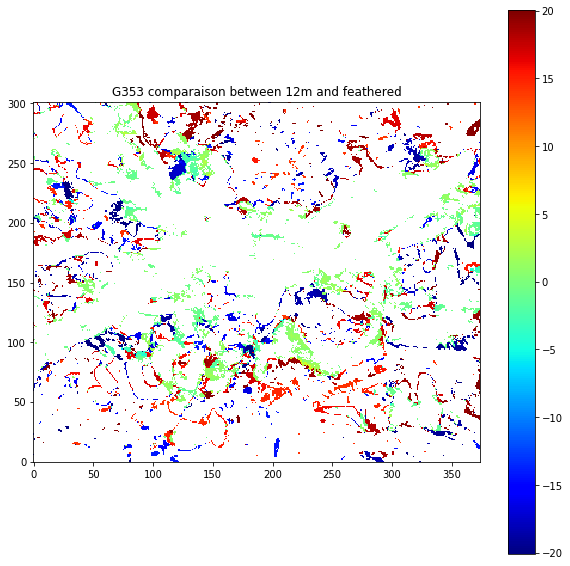

In [186]:
HDU = fits.open("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos_cut.fits")
cube_f = HDU[0].data
cube_f[np.isnan(cube_f)]=0
header = HDU[0].header

HDU = fits.open("/user/workdir/soldanof/data/G353_12_iso_cnts/moment1_g353_12_isolat_mean_M_pos_cut.fits")
cube_12 = HDU[0].data
cube_12[np.isnan(cube_12)]=0
header = HDU[0].header

diff = cube_f-cube_12
diff[np.abs(diff)<0.5]=np.nan
figure(figsize=(10,10))
imshow(diff,origin="lower",cmap='jet')
colorbar()
title("G353 comparaison between 12m and feathered")

Text(0.5, 1.0, 'G353 feathered comparaison between coherenet and original')

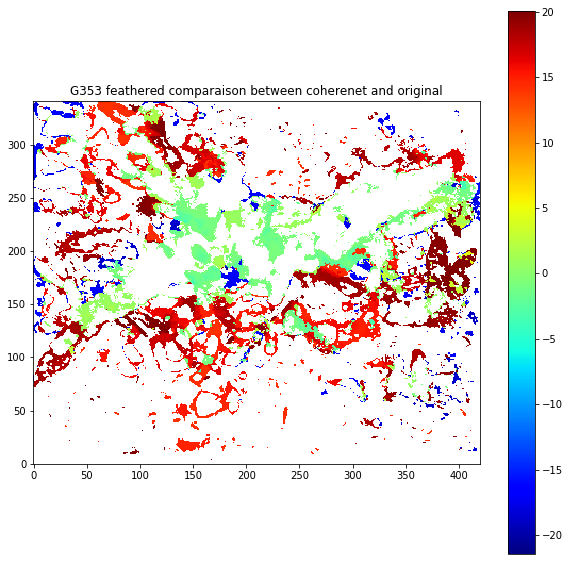

In [76]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_n2hp_feathered_contsub-isolated-crop-0.07pix-mom1_cut.fits")
cube_f = HDU[0].data
cube_f[np.isnan(cube_f)]=0
header = HDU[0].header

HDU = fits.open("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits")
cube_12 = HDU[0].data
cube_12[np.isnan(cube_12)]=0
header = HDU[0].header

diff = cube_f-cube_12
diff[np.abs(diff)<0.5]=np.nan
figure(figsize=(10,10))
imshow(diff,origin="lower",cmap='jet')
colorbar()
title("G353 feathered comparaison between coherenet and original")

***
# Traitement des donnée du spectre de puissance

In [21]:
t = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/s1ang.npy")
w_k = np.load("/user/workdir/soldanof/data/G353f_iso_cnts/wave_k.npy")

Fonction de trace du spectre de puissance

In [22]:
def affiche(n) :
    plt.plot(w_k, t[n],label="total")
    plt.plot(w_k, g[n],"o",label="gaussian")
    plt.plot(w_k, ng[n],"x",label="non gaussian")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('P(k)')
    plt.xlabel('k (arcmin$^{-1}$)')
    plt.title('canal number {}'.format(n))
    plt.legend()

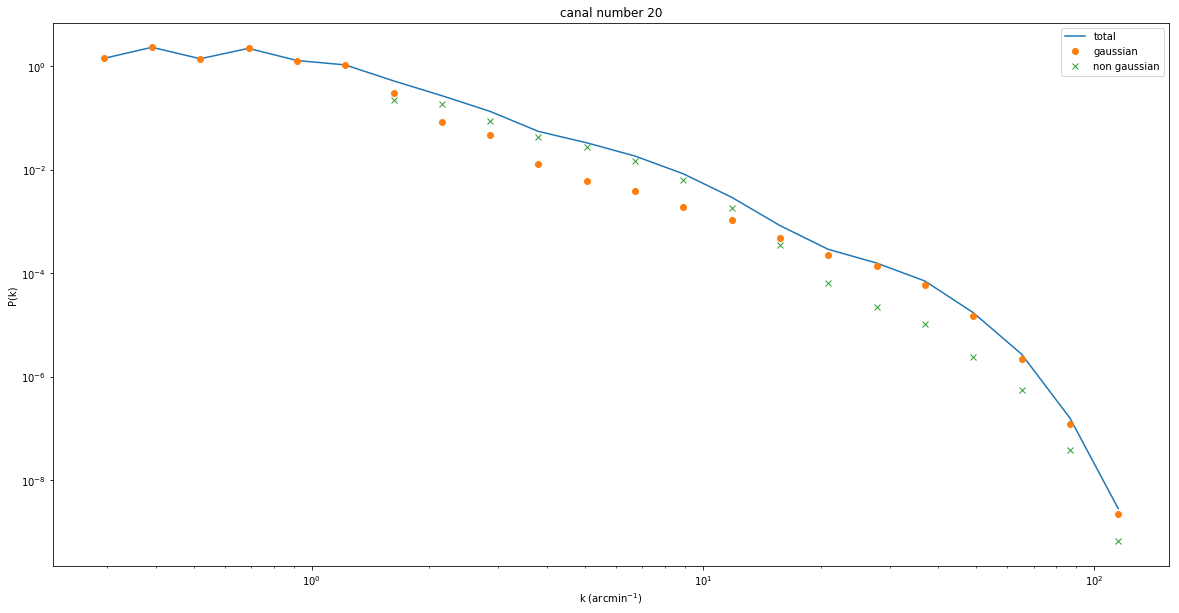

In [23]:
figure(figsize=(20,10))
affiche(20)

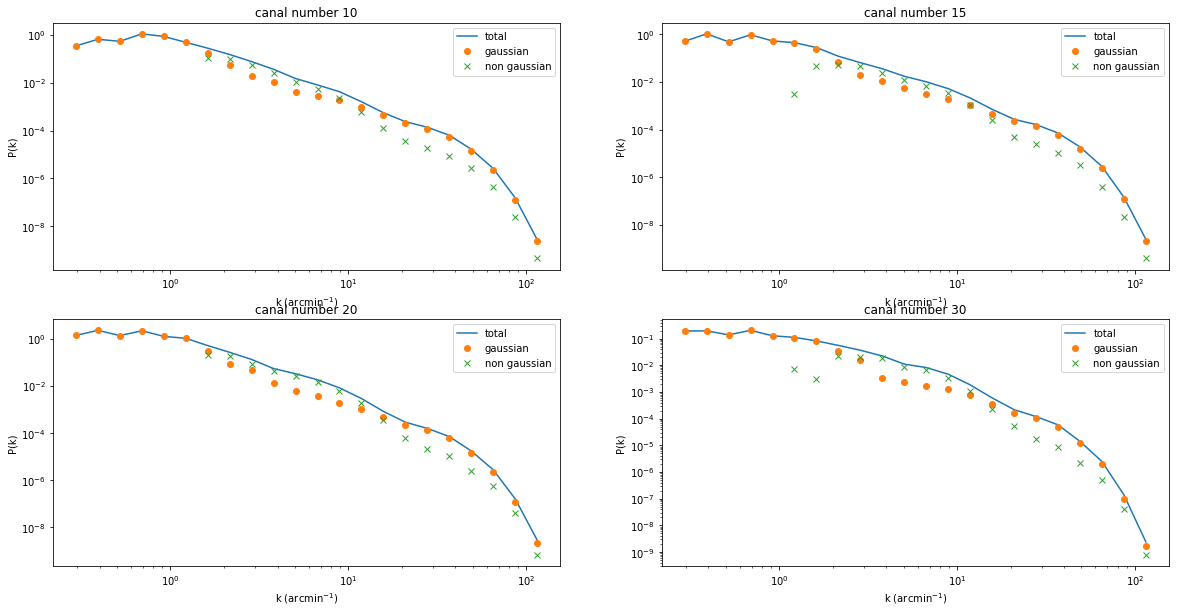

In [24]:
figure(figsize=(20,10))

subplot(2,2,1)
affiche(10)

subplot(2,2,2)
affiche(15)

subplot(2,2,3)
affiche(20)

subplot(2,2,4)
affiche(30)

***
# Coupe avec pvextractor

In [29]:
from pvextractor import Path
from pvextractor import extract_pv_slice
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

***
## coupe 1

In [62]:
filname = "/user/workdir/soldanof/data/G353f_iso_cnts/ng.fits"
HDU = fits.open(filname)
data = HDU[0].data
header = HDU[0].header
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
	del header['CROTA1']
	del header['CROTA2']
	del header['CROTA3']

w = wcs.WCS(header)

#Slice extraction
freq = w.pixel_to_world(0,0,0)[1]

p1 = SkyCoord('17:30:28.054 -34:41:41.030', unit=(u.hourangle, u.deg))
skyp1 = w.world_to_pixel(p1,freq)[0:2]
x1= int(skyp1[0])
y1= int(skyp1[1])

c2 = SkyCoord(262.6164935,-34.6956105, frame='icrs', unit='deg')
sky = w.world_to_pixel(c2,freq)[0:2]
x2=int(sky[0])
y2=int(sky[1])

p3 = SkyCoord('17:30:27.369 -34:41:50.058', unit=(u.hourangle, u.deg))
skyp3 = w.world_to_pixel(p3,freq)[0:2]
x3= int(skyp3[0])
y3= int(skyp3[1])

pt = [(x1,y1),(x2,y2), (x3,y3)]
width = 5

path = Path(pt, width=width)
pv_diag = extract_pv_slice(data, path, wcs=w)

INFO: Auto-setting vmin to -1.359e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.527e-01 [aplpy.core]


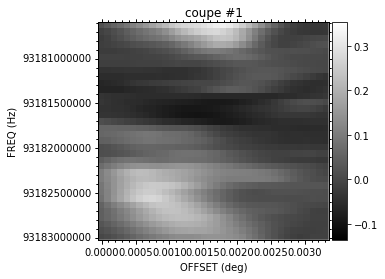

In [63]:
fig_vel = plt.figure(6)
f3 = aplpy.FITSFigure(pv_diag,figure=fig_vel)
f3.show_colorscale(cmap='gray')
f3.set_title("coupe #1")
f3.add_colorbar()

Text(0.5, 1.0, 'moment 1 coherent')

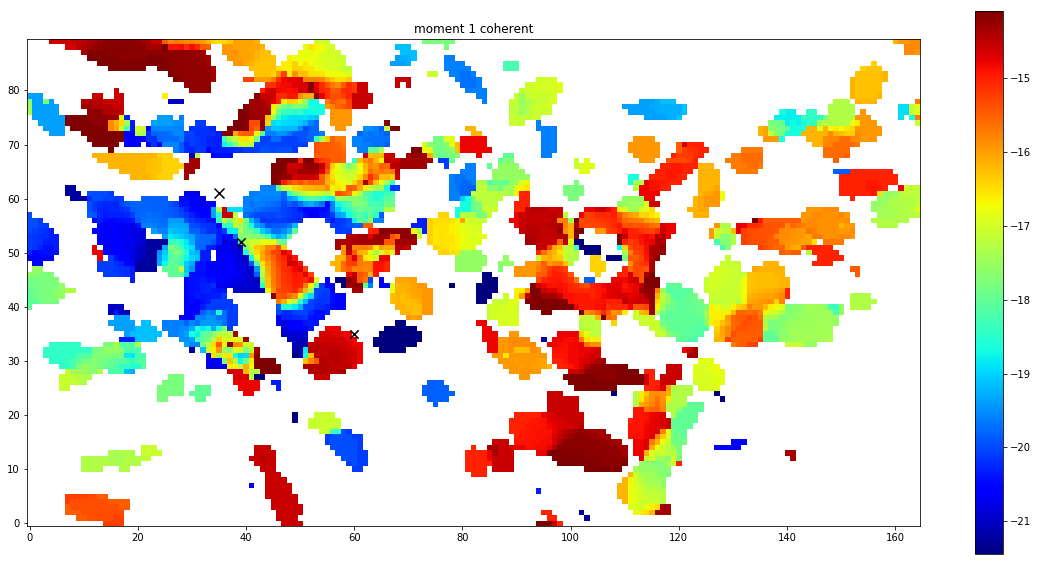

In [55]:
figure(figsize=(20,10))
filname = "/user/workdir/soldanof/data/G353f_iso_cnts/moment1G353f_SC_cut.fits"
HDU = fits.open(filname)
header =HDU[0].header
w = wcs.WCS(header)

skyp1 = w.world_to_pixel(p1)[0:2]
x1= int(skyp1[0])
y1= int(skyp1[1])

sky = w.world_to_pixel(c2)[0:2]
x2=int(sky[0])
y2=int(sky[1])

skyp3 = w.world_to_pixel(p3)[0:2]
x3= int(skyp3[0])
y3= int(skyp3[1])

moment1 = HDU[0].data
imshow(moment1,origin="lower",cmap='jet')
colorbar()
plt.scatter(x1, y1, s=100, c='k', marker='x')
plt.scatter(x2, y2, s=70, c='k', marker='x')
plt.scatter(x3, y3, s=70, c='k', marker='x')

title('moment 1 coherent')